# Data Mining Homework 2

In [1]:
from datetime import datetime
import random

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial.distance import cdist, pdist

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

from sklearn.cluster import KMeans

from sklearn.cross_validation import train_test_split
from sklearn.metrics import (accuracy_score, precision_score, recall_score,
                             roc_curve, confusion_matrix)

%matplotlib inline

/home/lego/Venvs/dataMining/lib/python3.5/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
TRAIN_TEST_RATIO = 0.7
RANDSEED = int(datetime.now().timestamp())

In [3]:
df = pd.read_excel('./default of credit card clients.xls', header=1)

## Problem 1
Split the data randomly to training data and test data ( 70% / 30% )

In [4]:
df_train, df_test = train_test_split(df,
                                     train_size=TRAIN_TEST_RATIO,
                                     random_state=RANDSEED)

sr_train_id = df_train.pop("ID")
sr_train_y = df_train.pop("default payment next month")

sr_test_id = df_test.pop("ID")
sr_test_y = df_test.pop("default payment next month")

In [5]:
df_train.shape

(21000, 23)

In [6]:
df_test.shape

(9000, 23)

## Problem 2
What is the accuracy of (1) Logistic Regression (2) k-Nearest Neighbors
(3) Naive Bayes (4) Random Forest (5) SVM model in test data

In [7]:
clfs = [
    (LogisticRegression(), "Logistic Regression"),
    (KNeighborsClassifier(), "k-Nearest Neighbors"),
    (GaussianNB(), "Naive Bayes"),
    (RandomForestClassifier(), "Random Forest"),
    (SVC(), "SVM")
]
LR = 0
KNN = 1
NB = 2
RF = 3
SVM = 4

In [8]:
df_acy = pd.DataFrame(columns=["Method", "Accuracy"])

predicted_result_to = []

for clf, name in clfs:
    clf.fit(df_train, sr_train_y)
    predicted = clf.predict(df_test)
    df_acy = df_acy.append([
            {
                "Method": name,
                "Accuracy": accuracy_score(sr_test_y, predicted)
            }],ignore_index=True)
    predicted_result_to.append(predicted)
df_acy

,Method,Accuracy
0,Logistic Regression,0.775889
1,k-Nearest Neighbors,0.751778
2,Naive Bayes,0.381444
3,Random Forest,0.803556
4,SVM,0.777556


## Problem 3
Draw the ROC curve in Logistic Regression

In [9]:
logreg = clfs[LR][0]
score = logreg.decision_function(df_test)
fpr, tpr, thresholds = roc_curve(sr_test_y, score)

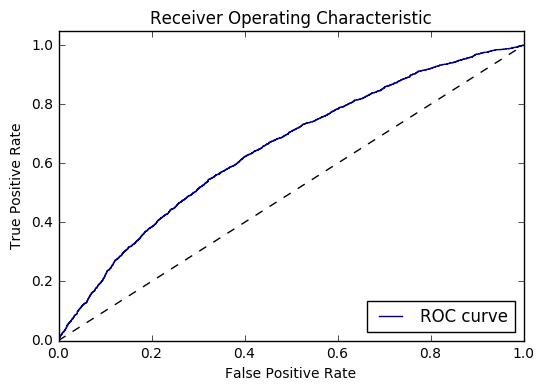

In [10]:
plt.figure()
plt.plot(fpr, tpr, color='darkblue', lw=1, label="ROC curve")
plt.plot([0, 1], [0, 1], color='black', lw=1, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

## Problem 4
Calculate the precision and recall in k-Nearest Neighbors

In [11]:
print ("Precision Score : {0:.5f}".format(
        precision_score(
            sr_test_y,
            predicted_result_to[KNN]
        )))
print ("Recall    Score : {0:.5f}".format(
        recall_score(
            sr_test_y,
            predicted_result_to[KNN]
        )))

Precision Score : 0.37628
Recall    Score : 0.16361


## Problem 5
Draw the Confusion Matrix of Naive Bayes

In [12]:
pd.DataFrame(
    confusion_matrix(
        sr_test_y,
        predicted_result_to[NB]
    ))

,0,1
0,1685,5298
1,269,1748


## Problem 6
What is the performance with different parameters in SVM

In [13]:
def rand_svm_param(**kwargs):
    params = {
        'C': random.random(),
        'kernel': random.choice(['rbf','linear','poly','sigmoid']),
        'degree': random.randint(1,3),
        'coef0': random.random(),
        'probability': random.choice([True, False]),
        'shrinking': random.choice([True, False]),
        'decision_function_shape': random.choice(['ovo','ovr',None]),
        'random_state': int(datetime.now().timestamp())
    }
    params.update(kwargs)
    return params

In [14]:
SIZE = 4
diff_svm_params = [rand_svm_param() for _ in range(SIZE)]
clfs = [SVC(**diff_svm_params[i]) for i in range(SIZE)]
predicts = [None for _ in range(SIZE)]

In [15]:
def fit_SVC(order):
    clfs[order].fit(df_train, sr_train_y)
    return

In [ ]:
from threading import Thread

tasks = []

for i in range(SIZE):
    t = Thread(target=fit_SVC, args=(i,))
    t.start()
    tasks.append(t)

for t in tasks:
    t.join()

for i, clf in enumerate(clfs):
    predicts[i] = clf.predict(df_test)

In [ ]:
# Perform data
pd.DataFrame(
    data= {
        'kernel': [parm['kernel'] for parm in diff_svm_params],
        'C': [parm['C'] for parm in diff_svm_params],
        'degree': [parm['degree'] for parm in diff_svm_params],
        'coef0': [parm['coef0'] for parm in diff_svm_params],
        'probability': [parm['probability'] for parm in diff_svm_params],
        'shrinking': [parm['shrinking'] for parm in diff_svm_params],
        'decision_function_shape': [parm['decision_function_shape'] for parm in diff_svm_params],
        'random_state': [parm['random_state'] for parm in diff_svm_params],
        'Accuracy': [accuracy_score(p,sr_test_y) for p in  predicts]
    },
    columns= ['kernel','C','degree','coef0','probability','shrinking','decision_function_shape','random_state','Accuracy']
)

## Problem 7
According to Gender, Education, and Marital status, how many kinds of
customer should be divided into?

In [81]:
df_g_e_m = df[["SEX", "EDUCATION", "MARRIAGE"]]

NUMBER_OF_K = 10

avg_sum_of_squares = [None for _ in range(NUMBER_OF_K)]

In [82]:
for i in range(1, NUMBER_OF_K):
    clf = KMeans(n_clusters=i).fit(df_g_e_m)
    dist_from_center = cdist(df_g_e_m.values, clf.cluster_centers_)
    dist = np.array([min(d) for d in dist_from_center])
    avg_sum_of_squares[i] = sum(dist**2) / dist.shape[0]

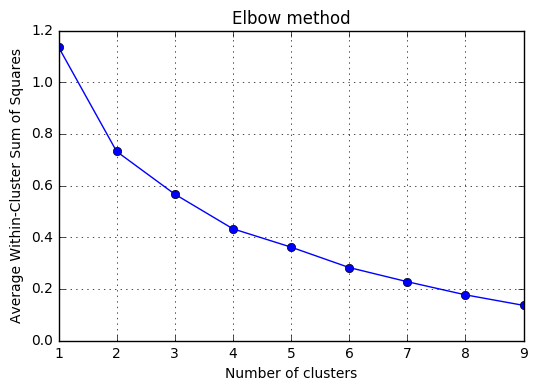

In [83]:
plt.title("Elbow method")
plt.xlabel("Number of clusters")
plt.ylabel("Average Within-Cluster Sum of Squares")
plt.grid(True)
plt.plot(avg_sum_of_squares, marker='o')
plt.show()

## Problem 8